In [1]:
import matplotlib.pyplot as plt
import numpy as np

threshs = np.linspace(.0,1.,20) #need to match the ones specified on experiments.py
ks = [0,5] #need to match the ones specified on experiments.py

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.6   # the amount of height reserved for white space between subplots

colors = {'lower': 'red', 'upper': 'blue', 'acc': 'green'}
params = [(0, False), (ks[1], True), (ks[1], False)]
titles = ['LLM few-shot WLs (#WLs=3)', 'LLM few-shot WLs + extra \n low quality WLs (#WLs=8)', 'LLM few-shot WLs + extra \n high quality WLs (#WLs=8)']

In [2]:
results = np.load('../results/results_exp2.npy', allow_pickle=True).item()

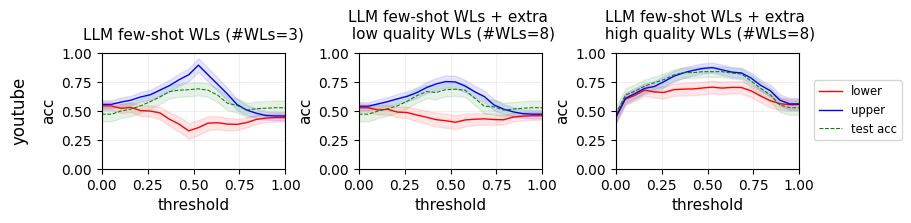

In [3]:
fig, axarr = plt.subplots(1, 3, figsize=(9, 1.5))
plt.subplots_adjust(wspace=0.4)

for i in range(3):
    ax = axarr[i]
    k, random_wls = params[i]
    
    for bound in ['lower', 'upper']:
        centers = results['bounds'][k][random_wls]['centers'][bound]
        ics = results['bounds'][k][random_wls]['cis'][bound]
        line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound}")
        ax.fill_between(threshs, np.array(ics)[:, 0], np.array(ics)[:, 1], color=colors[bound], alpha=.1)
    
    acc_centers = results['accs'][k][random_wls]['centers']['lower']
    acc_ics = results['accs'][k][random_wls]['cis']['lower']
    acc_line, = ax.plot(threshs, acc_centers, '--', color=colors['acc'], lw=.75, label="test acc")
    ax.fill_between(threshs, np.array(acc_ics)[:,0], np.array(acc_ics)[:,1], color=colors['acc'], alpha=.1)
              
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_ylabel('acc', size=11)
    ax.set_xlabel('threshold', size=11)
    ax.set_title(titles[i], size=11, y=1.05)
    ax.grid(alpha=.2)

txt = ax.text(-3.3, 0.5, 'youtube', va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with dataset name
txt.set_zorder(10)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', ncol=1, fontsize='small', bbox_to_anchor=(.91, 0.5))

plt.savefig('../plots/experiment2.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()